### Decision Tree

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
# class Node:
#     def __init__(self,predicted_class):
#         self.predicted_class = predicted_class
#         self.feature_index = 0
#         self.threshold = 0
#         self.left = None
#         self.right = None
        
# class DecisionTree:
#     def __init__(self,max_depth = None):
#         self.max_depth = max_depth
    
#     def fit(self,X,y):
#         self.n_classes_ = len(set(y))
# #         print('n_classes_',self.n_classes_)
# #         print('y',y)
#         self.n_features_ = X.shape[1]
#         self.tree_ = self._grow_tree(X,y)
    
#     def predict(self,X):
#         return [self._predict(inputs) for inputs in X]
    
#     def _best_split(self,X,y):
#         m = y.size #X.shape[0]
#         if m <= 1:
#             return None,None
    
#         num_parent = [np.sum(y==c) for c in range(self.n_classes_)]
# #         print('num parent',num_parent)
#         best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
# #         print('best gini', best_gini)
#         best_idx,best_thr = None,None
        
#         for idx in range(self.n_features_):
#             thresholds,classes = zip(*sorted(zip(X[:,idx],y))) # sorted according to X and looop through features
#             num_left = [0] *self.n_classes_
#             num_right = num_parent.copy()
#             for i in range(1,m):
#                 c = classes[i-1]
# #                 print('c',c)
#                 num_left[c] += 1
# #                 print('num left',num_left)
#                 num_right[c] -= 1
# #                 print('num right',num_right)
#                 gini_left  = 1.0 - sum((num_left[x]/i)**2 for x in range(self.n_classes_))
#                 gini_right = 1.0 - sum((num_right[x]/i)**2 for x in range(self.n_classes_))
                
#                 gini = (i * gini_left + (m - i) * gini_right) / m
# #                 print('gini',gini)
# #                 print('best gini',best_gini)
# #                 print('thresholds[i]',thresholds[i])
# #                 print('thresholds[i-1]',thresholds[i-1])
                
#                 if thresholds[i] == thresholds[i-1]:
# #                     print('skip')
#                     continue
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_idx = idx
#                     best_thr = (thresholds[i] + thresholds[i-1])/2
# #                     print('best feature',best_idx,'best threshold',best_thr)
#         return best_idx, best_thr
    
#     def _grow_tree(self,X,y,depth=0):
#         num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
# #         print('num_samples_per_class',num_samples_per_class)
#         predicted_class = np.argmax(num_samples_per_class)
#         node = Node(predicted_class = predicted_class)
        
#         if depth < self.max_depth:
# #             print('depth', depth)
#             idx,thr = self._best_split(X,y)
#             if idx is not None:
#                 indices_left = X[:,idx] < thr
#                 X_left,y_left = X[indices_left],y[indices_left]
#                 X_right,y_right = X[~indices_left], y[~indices_left]
#                 node.feature_index = idx
# #                 print('chosen feature',node.feature_index)
#                 node.threshold = thr
# #                 print('chosen threshold',node.threshold)
#                 node.left = self._grow_tree(X_left,y_left,depth + 1)
#                 node.right = self._grow_tree(X_right,y_right,depth+1)
#         return node
    
#     def _predict(self, inputs):
#         node = self.tree_
#         while node.left:
#             if inputs[node.feature_index] < node.threshold:
#                 node = node.left
#             else:
#                 node  = node.right
#         return node.predicted_class
    
# # if __name__ == "__main__":
# #     import sys
# #     from sklearn.datasets import load_iris

# #     dataset = load_iris()
# #     X, y = dataset.data, dataset.target
# #     clf = DecisionTree(max_depth=10)
# #     clf.fit(X, y)
# #     print(clf.predict([[0, 0, 5, 1.5]]))                


In [34]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


# if __name__ == "__main__":
#     import sys
#     from sklearn.datasets import load_iris

#     dataset = load_iris()
#     X, y = dataset.data, dataset.target
#     clf = DecisionTree(max_depth=10)
#     clf.fit(X, y)
#     print(clf.predict([[0, 0, 5, 1.5]]))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(1050, 2) (450, 2) (1050,) (450,)


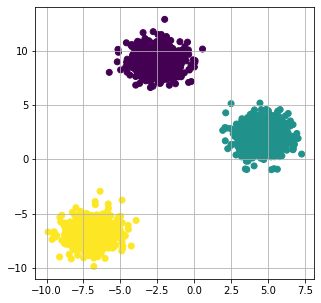

In [35]:
X, y = make_blobs(n_samples=1500, cluster_std=[1.0, 1.0, 1.0], random_state=42)
print(type(X),type(y))
# X, y = make_blobs(n_samples=1500, centers=3,
#                   random_state=0, cluster_std=1.0)

# X, y = make_blobs(n_samples=3000, centers=4,
#                   random_state=40, cluster_std=1.0)
# X[:,0] = X[:,0]+100
# X[:,1] = X[:,1]+100
# X[[y==1]][:,0] = X[[y==1]][:,0] - 300
# print(X.shape,y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, shuffle=True, random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
# print(y_train)
# print(y_test)

figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt

ax.grid()
ax.scatter(X[:, 0], X[:, 1], c=y)

In [36]:
model = DecisionTree(max_depth = 3)
model.fit(X_train,y_train)
preds = model.predict(X_test)

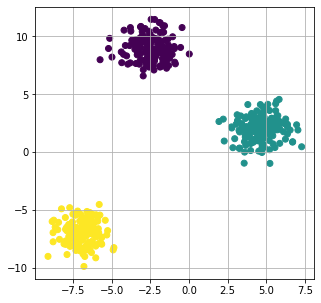

In [37]:
figure = plt.figure(figsize=(5, 5))
ax = plt.axes()  #get the instance of axes from plt
# print(y_test)
# print(preds)
ax.grid()
ax.scatter(X_test[:,0], X_test[:,1], c=preds)
# ax.scatter(X_test[:, 0], X_test[:, 1], c=preds)

### Sklearn

(200, 200)
(200, 200)


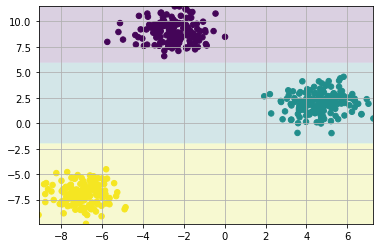

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit(X_train, y_train)

def plot_tree(model, X, y):
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30)
    xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]), np.max(X[:,0]), num=200),
                             np.linspace(np.min(X[:,1]), np.max(X[:,1]), num=200))
    print(xx.shape)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    print(Z.shape)
    # Create a color plot with the results
    n_classes = len(set(y))
    contours = plt.contourf(xx, yy, Z, alpha=0.2)


plot_tree(model, X_test, y_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
#np.c_ = Translates slice objects to concatenation along the second axis.
# Z = model.predict(np.c_[X_test[:,0], X_test[:,1]]).reshape(X_test[:,0].shape)
Z = model.predict(X_test)
print(Z)
# print(np.c_[X_test[:,0], X_test[:,1]])

from sklearn.metrics import classification_report
print(classification_report(y_test, Z))

[2 1 2 1 2 2 0 2 1 1 1 2 2 1 2 0 1 0 2 0 1 1 2 2 0 0 2 0 2 2 0 1 0 1 1 2 2
 2 0 0 2 1 0 0 0 2 2 0 0 0 0 2 0 0 1 2 1 1 1 1 1 1 0 1 0 1 2 2 0 1 0 2 0 2
 0 2 2 1 2 2 2 2 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 2 1 2 0 1 0 1 2 2 1 1 0 2 1
 0 1 2 0 0 2 2 0 0 0 0 1 1 1 1 0 2 1 1 2 0 0 1 2 0 2 1 1 1 2 2 2 1 0 1 2 1
 1 1 1 1 1 2 0 0 1 2 0 0 2 1 0 0 2 1 2 2 2 1 1 0 2 0 2 1 0 1 1 1 2 2 2 1 0
 1 1 2 0 2 0 2 2 1 0 2 0 0 0 1 2 1 0 0 0 2 1 0 1 2 1 0 0 1 0 0 1 2 2 0 2 2
 1 1 0 1 1 1 2 2 2 0 0 1 0 0 1 1 1 0 2 2 0 2 1 1 1 0 2 1 1 0 2 0 0 1 0 0 1
 1 2 2 2 2 1 1 2 2 1 0 0 0 0 1 1 0 0 0 1 2 0 2 0 0 2 1 1 1 2 1 2 1 2 1 1 2
 2 0 2 2 1 0 2 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 2 0 1 0 2 0 2 1 0 1 2 1 0 2 0
 1 0 2 1 2 1 2 0 0 1 1 2 0 1 2 0 0 1 1 0 2 0 2 2 0 0 0 0 0 0 1 0 1 2 2 1 0
 0 2 0 1 1 0 1 1 2 1 2 0 0 0 2 1 0 2 2 0 1 1 2 2 0 1 1 2 1 1 2 1 2 0 2 2 2
 1 2 2 2 0 0 1 2 2 0 0 1 1 2 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 2 2 1 0 1
 1 2 2 2 2 2]
              precision    recall  f1-score   support

           0       1.00      1.

In [40]:
print(model.tree_.max_depth)

2
